### Language Identifier with NLP

Paola Vizcarra

#### Use NLTK to build a model that analyzes sentences in different languages and determines which language is being used.

1. There are 2 input files _data.csv_ and _labels.csv_ from [source](https://www.kaggle.com/sharansmenon/wili-2018).
<br>WiLI-2018, the Wikipedia language identification benchmark dataset, contains 235000 paragraphs of 235 languages.<br>
Each language in this dataset contains 1000 rows/paragraphs. 
- In the data.csv file there are 235,000 rows (235 unique values) and 2 columns, containing paragraphs in the different languages and the abbreviation identifier for the language used.
- The labels.csv file contains 235 rows/unique values and 9 columns, containing the label/abbreviation, its corresponding language and 7 other identifiers.

#### Tokenizing Asian text 

Languages like Chinese and Japanese contains continuous stream of characters with no explicit separators, one way to tokenize and use segmentation in these texts is to use Half-overlapping bi n-grams. In order to preserve some words, it is necessary to overlap symbols to create constructs that will help match the right bi n-grams. <br>
This estimation shows to be highly effective. <br>
[source](https://www.youtube.com/watch?v=HYwKGZIvvb4)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import nltk
from nltk import bigrams

1a. Read data from data.csv into a DataFrame.<br>
Print the size of the DataFrame and the first few lines of data.

In [8]:
data = pd.read_csv('data.csv', encoding="utf-8")
print(data.shape)
data.head()

(235000, 2)


,text,class
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est\n
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe\n
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai\n
3,"Après lo cort periòde d'establiment a Basilèa,...",oci\n
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha\n


1b. Read data from labels.csv into a DataFrame.<br>
Print the size of the DataFrame and the first few lines of data.

In [9]:
labels = pd.read_csv('labels.csv',sep=';')
print(labels.shape)
labels.head()

(235, 9)


,Label,English,Wiki Code,ISO 369-3,German,Language family,Writing system,Remarks,Synonyms
0,ace,Achinese,ace,ace,Achinesisch,Austronesian,NaN,NaN,NaN
1,afr,Afrikaans,af,afr,Afrikaans,Indo-European,NaN,NaN,NaN
2,als,Alemannic German,als,gsw,Alemannisch,Indo-European,NaN,(ursprünglich nur Elsässisch),NaN
3,amh,Amharic,am,amh,Amharisch,Afro-Asiatic,NaN,NaN,NaN
4,ang,Old English,ang,ang,Altenglisch,Indo-European,NaN,(ca. 450-1100),Angelsächsisch


1c. First clean the label (remove '/n') in the class column in the data DataFrame.<br>
Then, replace the label for its correspondent language.

In [10]:
data['class'] = data['class'].str.extract('([A-Za-z-]+)',expand=False)

data["class"] = [''.join(labels.loc[labels['Label'] == 
                                    text, 'English'].values) 
                 for text in data["class"]]
print(data.shape)
data.head()

(235000, 2)


,text,class
0,Klement Gottwaldi surnukeha palsameeriti ning ...,Estonian
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",Swedish
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,Maithili
3,"Après lo cort periòde d'establiment a Basilèa,...",Occitan
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,Thai


1d. List all the languages found in the DataFrame.

In [11]:
data["class"].unique()

array(['Estonian', 'Swedish', 'Maithili', 'Occitan', 'Thai', 'Oromo',
       'Limburgan', 'Gujarati', 'Western Panjabi', 'Zeeuws',
       'Karachay-Balkar', 'Haitian Creole', 'Picard', 'Tamil',
       'Vietnamese', 'Panjabi', 'Silesian', 'Central Kurdish', 'Friulian',
       'Wu Chinese', 'Egyptian Arabic', 'Tongan', 'Basque', 'Banyumasan',
       'Gilaki', 'Dutch', 'Tibetan', 'Japanese', 'Aragonese', 'Sardinian',
       'Extremaduran', 'Sinhala', 'Kurdish', 'Chechen', 'Turkmen',
       'Pangasinan', 'Turkish', 'Alemannic German', 'Komi-Permyak',
       'Latin', 'Urdu', 'Tatar', 'Buryat', 'Indonesian', 'Kirghiz',
       'Cantonese', 'Danish', 'Portuguese', 'French', 'Oriya', 'Bokmål',
       'Lojban', 'Konkani', 'Amharic', 'Central Khmer', 'Serbo-Croatian',
       'Slovene', 'Bosnian', 'Tetum', 'Standard Chinese', 'Korean',
       'Yakut', 'Aromanian', 'Asturian', 'Wolof', 'Bulgarian',
       'Scottish Gaelic', 'Malay', 'Crimean Tatar', 'Luganda',
       'Sundanese', 'Breton', 'Mongoli

1e. Use the DataFrame to develop a Language Identifier for 25 different languages.<br>
Select the languages to be used on the Language Identifier.


In [12]:
lang = ['Arabic', 'Bulgarian', 'Standard Chinese', 'Dutch', 'English', 
        'Estonian', 'French', 'German', 'Hebrew', 'Hindi', 
        'Indonesian', 'Italian', 'Japanese', 'Korean', 'Latin', 
        'Persian', 'Polish', 'Portuguese', 'Romanian', 'Russian', 
        'Spanish', 'Swedish', 'Thai', 'Turkish', 'Vietnamese']
len(lang)

25

1f. Using the selected languages, filter the DataFrame.

In [13]:
data = pd.DataFrame(data[data['class'].isin(lang)])
data.reset_index(drop=True, inplace=True) # reset the index value
print(data.shape)
data.head(6)

(25000, 2)


,text,class
0,Klement Gottwaldi surnukeha palsameeriti ning ...,Estonian
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",Swedish
2,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,Thai
3,Bùi Tiến Dũng (sinh năm 1959 tại huyện Ứng Hòa...,Vietnamese
4,De spons behoort tot het geslacht Haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese


1g. Rename languages as needed, keep one word ('Standard Chinese' becomes 'Chinese').

In [14]:
data['class'] = data['class'].str.extract('([A-Za-z]*$)',expand=False) 
data.sample(n=5)

,text,class
18049,アルゴリズムは極めて単純である。最初の段階では、各ノードは直近のノードがどれかという情報と、...,Japanese
24982,Le village est une station familiale de sports...,French
4411,Letak dan posisi yang strategis telah mampu me...,Indonesian
11741,"""Sinise granaatkivi mõistatus"" (inglise keeles...",Estonian
3180,En 1984 entró en la prestigiosa escuela Royal ...,Spanish


1h. Check amount of samples per language.

Text(0, 0.5, 'Samples per Language')

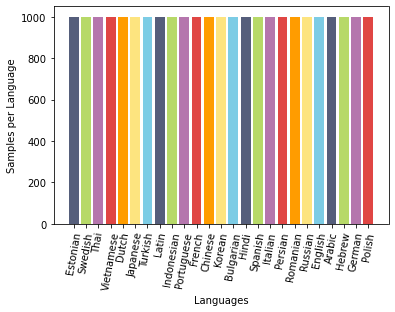

In [15]:
plt.bar(data['class'].unique(),data.groupby('class').size(),
       color=['#555E7B', '#B7D968', '#B576AD', '#E04644',
               '#FF9C00', '#FDE47F', '#7CCCE5'])
plt.xticks(rotation=80)
plt.xlabel("Languages")
plt.ylabel("Samples per Language")

1i. Create the y variable from the DataFrame.
<br>Print the size of y.

In [16]:
y = data['class']
print(y.shape)
y.head()

(25000,)


0      Estonian
1       Swedish
2          Thai
3    Vietnamese
4         Dutch
Name: class, dtype: object

1j. Create the X variable from the DataFrame.
<br>Print the size of X and the first few lines of x.

In [17]:
X = data.drop(columns=['class'])
print(X.shape)
X.head()

(25000, 1)


,text
0,Klement Gottwaldi surnukeha palsameeriti ning ...
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)...."
2,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...
3,Bùi Tiến Dũng (sinh năm 1959 tại huyện Ứng Hòa...
4,De spons behoort tot het geslacht Haliclona en...


1k. Find the indexes of Chinese and Japanese sentences in the DataFrame.<br>
Print the first indexes on each.

In [19]:
chnLang = data.index[data['class'] == "Chinese"].tolist()
japLang = data.index[data['class'] == "Japanese"].tolist()
print(chnLang[0:5])
print(japLang[0:5])

[12, 120, 131, 164, 262]
[5, 8, 34, 47, 86]


1l. Continue the pre-processing step by:
- remove all numbers and underscores<br>(every language has its own characters so we won't just keep a to Z)
- lowercase all words<br>

Modify the segmentation for Chinese and Japanese.<br>
Print the resulting X variable.

In [20]:
from nltk.tokenize import RegexpTokenizer 
tokenizer = RegexpTokenizer('[^_(\n)\d]+')
# to preserve grammar in different languages,
# only numbers, underscore and new line are removed
# Since every language has different rules, stemming won't be applied

X_Prs = pd.DataFrame({0: X.text})

for i in range(len(X)):
    # Remove all numbers, lowercase all words
    X_Prs[0][i] = tokenizer.tokenize(X_Prs[0][i].lower())
    # join back into sentence
    X_Prs[0][i] = ' '.join(X_Prs[0][i])
    # if sentence index in list of chinese or japanese languages
    # Segmentate in Half-overlapping bi n-grams
    if (X_Prs.index[i] in chnLang) | (X_Prs.index[i] in japLang):
        X_Prs[0][i] = bigrams(X_Prs[0][i])
        X_Prs[0][i] = ' '.join(''.join(grams) for grams in X_Prs[0][i])

print(X_Prs.head(6))
print(X_Prs.shape)

                                                   0
0  klement gottwaldi surnukeha palsameeriti ning ...
1  sebes, joseph; pereira thomas    på eng . the ...
2  ถนนเจริญกรุง  อักษรโรมัน: thanon charoen krung...
3  bùi tiến dũng  sinh năm   tại huyện ứng hòa tỉ...
4  de spons behoort tot het geslacht haliclona en...
5  エノ ノが が行 行き きが がか かり りで でバ バス スに に乗 乗っ って てし し...
(25000, 1)


1m. Convert the strings in X to vectors of numbers.<br>
Show the size of the vectors.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X_Prs[0])
X_vectors = vect.transform(X_Prs[0])
print(X_vectors[0])
X_vectors.shape

  (0, 139)	1
  (0, 156)	2
  (0, 2622)	1
  (0, 54734)	1
  (0, 54735)	1
  (0, 54736)	1
  (0, 57284)	1
  (0, 57857)	1
  (0, 59400)	1
  (0, 62381)	1
  (0, 66990)	2
  (0, 69605)	2
  (0, 72640)	1
  (0, 74848)	1
  (0, 77077)	1
  (0, 79525)	1
  (0, 79866)	2
  (0, 84865)	1
  (0, 84866)	1
  (0, 94729)	2
  (0, 94789)	2
  (0, 96685)	1
  (0, 98170)	1
  (0, 100284)	1
  (0, 101335)	1
  (0, 101599)	1
  (0, 101600)	1
  (0, 134686)	3
  (0, 136558)	1
  (0, 143578)	1
  (0, 145314)	1
  (0, 150486)	1
  (0, 158711)	1
  (0, 158742)	1
  (0, 159593)	1


(25000, 400691)

1n. Split the dataset into training and testing sets. <br>
Show the size of the sets.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_vectors,y,test_size=0.3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(17500, 400691) (17500,) (7500, 400691) (7500,)


1o. Use the Multinomial Naive Bayes model to train, then test the model.

In [23]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array(['Hindi', 'Dutch', 'Italian', ..., 'Vietnamese', 'Russian',
       'Persian'], dtype='<U10')

1p. Show the accuracy of the model by displaying the accuracy score, confusion matrix, and F1 score.

Accuracy: 
 0.9776 

F1 weighted: 
 0.9784713048879731 

F1 per language:
 ['Arabic F1: 1.0', 'Bulgarian F1: 0.9756097560975608', 'Chinese F1: 0.9917081260364843', 'Dutch F1: 0.9804560260586319', 'English F1: 0.8452722063037249', 'Estonian F1: 0.970684039087948', 'French F1: 0.9598662207357859', 'German F1: 0.9603960396039605', 'Hebrew F1: 0.998158379373849', 'Hindi F1: 0.9965986394557823', 'Indonesian F1: 0.9896551724137931', 'Italian F1: 0.9947460595446586', 'Japanese F1: 0.9921259842519685', 'Korean F1: 0.982638888888889', 'Latin F1: 0.9350237717908082', 'Persian F1: 0.9985528219971056', 'Polish F1: 0.9896193771626297', 'Portuguese F1: 0.9608540925266904', 'Romanian F1: 0.9953051643192489', 'Russian F1: 0.9929824561403509', 'Spanish F1: 0.9889763779527558', 'Swedish F1: 0.9964285714285714', 'Thai F1: 0.9899665551839464', 'Turkish F1: 0.9868852459016394', 'Vietnamese F1: 0.9908592321755028']

Confusion Matrix:


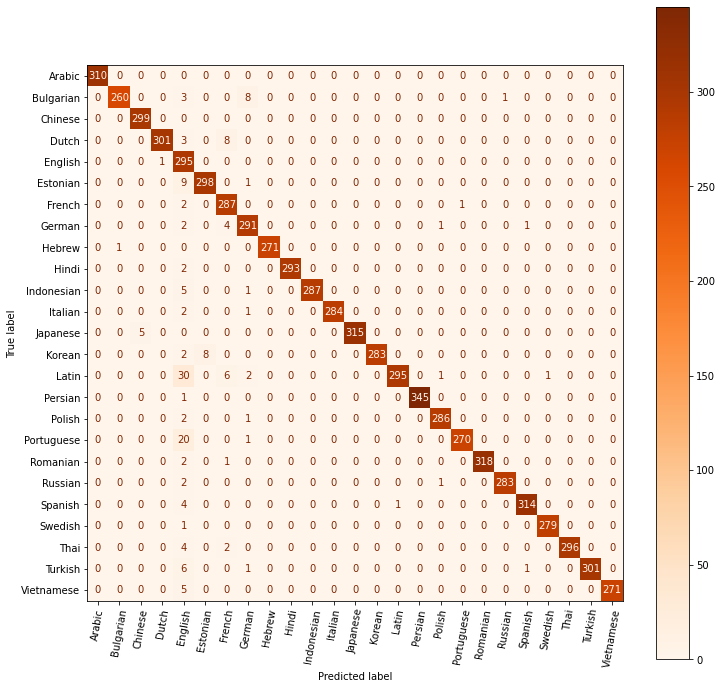

In [25]:
# accuracy
print("Accuracy: \n", metrics.accuracy_score(y_test, y_pred), "\n")

# F1
print("F1 weighted: \n", f1_score(y_test, y_pred, average='weighted'), '\n')

F1score = f1_score(y_test, y_pred, average=None)  # gives a better visualization per language
langs = sorted(y.unique())
print("F1 per language:\n",['{} F1: {}'.format(langs[i], F1score[i]) 
                            for i in range(len(F1score))])

# Confusion Matrix 
print("\nConfusion Matrix:")
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Oranges, ax=ax)
ax.tick_params(axis='x', rotation=80)

Both, the confusion matrix and F1 score per language show Chinese and Japanese predictions are highly assertive. <br>
Overall, predictions are balanced.

1q. Testing other sentences.

In [28]:
senTest = [
    "con motivo de la celebración del aniversario",     # Spanish
    "je suis ravi de vous rencontrer",                  # French
    "i am not very sure of that",                       # English
    "你想要些什么",                                       # Chinese
    "おはようございます。",                                # Japanese
    "Yepyeni bir başlangıç…",                           # Turkish
    "من فضلك واحد بيرة.",                               # Arabic
    "vad trevligt att träffas"]                         # Swedish

from nltk.tokenize.util import is_cjk
# segmentate sentence if chinese, japanese or korean characters are found

for index in range(len(senTest)):
    isCJ = [1 if is_cjk(ch) else 0 for ch in senTest[index]]
    if 1 in isCJ:     
        text = bigrams(senTest[index])
        senTest[index] = ' '.join(''.join(grams) for grams in text)

senTest_vectors = vect.transform(senTest)
y_pred = classifier.predict(senTest_vectors)
y_pred

array(['Spanish', 'French', 'English', 'Chinese', 'Japanese', 'Turkish',
       'Arabic', 'Swedish'], dtype='<U10')

Percentage of accurate predictions is high.

1r. Let user enter a text string and have the model predict the language.

In [27]:
print('Test the Language Identifier, \n'+
      'Enter some text and then "Press Enter" to see the result.')
sentence = input("Text to identify: ")
textIn = sentence

# segmentate sentence if chinese, japanese or korean characters are found
isCJ = [1 if is_cjk(ch) else 0 for ch in sentence]
if 1 in isCJ:
    text = bigrams(sentence)
    sentence = ' '.join(''.join(grams) for grams in text)

sentenceTest_vectors = vect.transform([sentence])
y_pred = classifier.predict(sentenceTest_vectors)
print('\nYou entered:', textIn)
print('Language identified as:', *y_pred)

Test the Language Identifier, 
Enter some text and then "Press Enter" to see the result.
Text to identify: Güneşin batışını seyrediyorum.

You entered: Güneşin batışını seyrediyorum.
Language identified as: Turkish


***

### Output and conclusion

In order to build a highly effective Language Identifier, languages have to be tokenized according to their writing system (Some writing systems don't use spaces or use spaces between syllables instead of between words, others use suffixes in a complete different way than English does).<br>
Some methods, like Half-overlapping bi n-grams show to be very effective for languages like Chinese and Japanese. But, the more diverse the languages in the identifier, the greater the need for a custom tokenizer and steammer for each language. Different languages need different approaches.